In [1]:
from __future__ import print_function
from pixell import enmap,utils, reproject, enplot
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import urllib.request
from astropy.table import QTable
import astropy.units as u
from astropy.io import fits
import csv
import yaml
%matplotlib inline

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

In [14]:
with open('/scratch/r/rbond/jorlo/S18d_202006/selFn/tileDefinitions.yml') as f:
    
    data = yaml.load(f)

data[0]

{'RADecSection': [93.36666666666623,
  110.86666666666623,
  -60.04166666666643,
  -54.71166666666643],
 'tileName': '1_0_0'}

In [21]:
def tileFinder(ra, dec, data):
    #Given an RA and Dec in deg, find the S18d tile containing that RA and Dec
    for i, tile in enumerate(data):
        box = tile['RADecSection']
        if box[0]<=ra<=box[1] and box[2]<=dec<= box[3]:
            return tile['tileName']

        

'1_0_0'

In [36]:
def s18dStamp(ra, dec, data, name, width = 0.5):
    #Find tile corresponding to RA, Dec
    path = '/scratch/r/rbond/jorlo/S18d_202006/filteredMaps/'
    tileName = tileFinder(ra, dec, data)
    tile = enmap.read_map(path+tileName+'/Arnaud_M2e14_z0p4#'+tileName+'_filteredMap.fits')
    
    #Stamp tile at position
    ra, dec = np.deg2rad([ra,dec])
    width = np.deg2rad(width)
    box = [[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]]
    stamp = tile.submap(box)
    
    plt.imshow(stamp)
    plt.show()
    #Return map
    enmap.write_map('./for_tony/{}.fits'.format(name), stamp)
    return


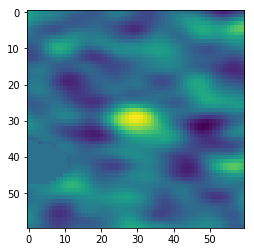

In [37]:
s18dStamp(303.1103611788376,-56.83093699573238, data, 'ACT-CL_J2012.4-5649')